## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

merge_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Use Groupby to organize data by Drug Regimen
new_data = merge_data.groupby(["Drug Regimen"])

#Calulate each statistic
mean_volume = new_data["Tumor Volume (mm3)"].mean()
median_volume = new_data["Tumor Volume (mm3)"].median()
variance_volume = new_data["Tumor Volume (mm3)"].var()
std_volume = new_data["Tumor Volume (mm3)"].std()
sem_volume = new_data["Tumor Volume (mm3)"].sem()

statistic_table = pd.DataFrame({"Mean": mean_volume,
                                "Median": median_volume,
                                "Variance": variance_volume,
                                "Standard Deviation": std_volume,
                                "Standard Error": sem_volume})
statistic_table.head()


,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots

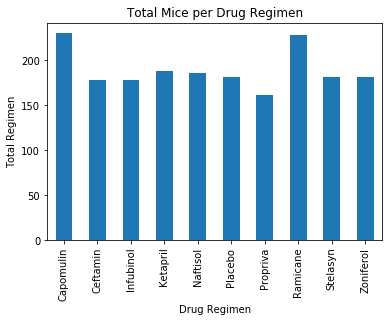

<Figure size 432x288 with 0 Axes>

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#Collect total amount of mouse per drug regimen
drug_total = new_data["Drug Regimen"].count()

#plot the points
mouse_chart = drug_total.plot(kind='bar')

#set title and labels
mouse_chart.set_title("Total Mice per Drug Regimen")
mouse_chart.set_xlabel("Drug Regimen")
mouse_chart.set_ylabel("Total Regimen")

plt.show()
plt.tight_layout()


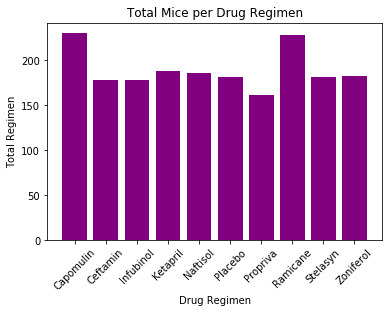

In [41]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

#Use np.arange to set the x-values
x_axis = np.arange(len(drug_total))

#Create ticks for the bar plots
drug_name = []

for name in new_data:
    drug_name.append(name[0])

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_name)

plt.bar(x_axis, drug_total, color='purple', align='center')

plt.title("Total Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Regimen")
plt.xticks(rotation=45)
plt.show()

## Pie plots

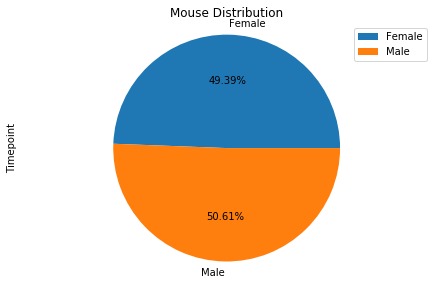

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
new_data = merge_data[["Sex", "Timepoint"]]
gender_grouping = new_data.groupby("Sex")
gender_totals = gender_grouping.count()
gender_list = gender_totals.keys()

mouse_pie = gender_totals.plot(kind='pie', y=gender_list, autopct="%1.2f%%", title=("Mouse Distribution"))

plt.tight_layout()
plt.axis("equal")
plt.show()


C:\Users\josep\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


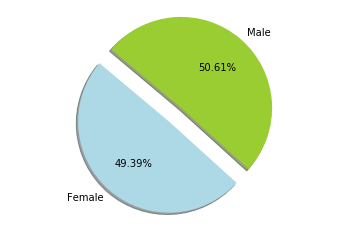

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
new_data = merge_data[["Sex", "Timepoint"]]
gender_grouping = new_data.groupby("Sex")
gender_totals = gender_grouping.count()
gender_list = ["Female", "Male"]
colors = ["lightblue", "yellowgreen"]
explode = (0, 0.2)

plt.pie(gender_totals, explode=explode, labels=gender_list, colors=colors, autopct="%1.2f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Determine total count of each Drug Regimen
treatment = merge_data["Drug Regimen"].value_counts()

#Sort the data by Drug Regimen to determine total volume per regimen
sort_by_drug = merge_data.groupby("Drug Regimen")
just_volume = round(sort_by_drug["Tumor Volume (mm3)"].sum(), 2)

#Place total amount of each regimen and total volume in a dataframe
just_volume_df = pd.DataFrame({"Drug Regimen": treatment,
                               "Tumor Volume (mm3)": just_volume})

#Out of the top four drug regimens, the lowest count is 186, so drop all rows < 186
popular_regimins = just_volume_df.loc[just_volume_df["Drug Regimen"] >= 186]
popular_regimins

,Drug Regimen,Tumor Volume (mm3)
Capomulin,230,9355.42
Ketapril,188,10384.30
Naftisol,186,10105.67
Ramicane,228,9169.42


In [8]:
#Calculating IQR and potential outlies

#Set the quartiles
quartiles = just_volume.quantile([.25,.5,.75])
lowerq = round(quartiles[0.25], 2)
upperq = round(quartiles[0.75], 2)
iqr = round(upperq-lowerq, 2)

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")

#Determine lower and upper bounds
lower_bound = round(lowerq - (1.5*iqr), 2)
upper_bound = round(upperq + (1.5*iqr), 2)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume (mm3) is: 9356.87
The upper quartile of Tumor Volume (mm3) is: 9807.17
The interquartile range of Tumor Volume (mm3) is: 450.3
Values below 8681.42 could be outliers.
Values above 10482.62 could be outliers.


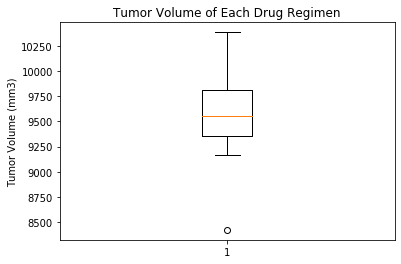

In [9]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume of Each Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(just_volume)
plt.show()

## Line and scatter plots

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
data = merge_data[["Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
cap_only = data.loc[data["Drug Regimen"] == "Capomulin"]
cap_group = cap_only.groupby(["Drug Regimen", "Timepoint"])
cap_tumor = cap_group["Tumor Volume (mm3)"].sum()
cap_keys = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]


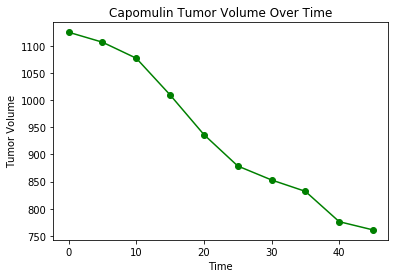

In [11]:
plt.plot(cap_keys, cap_tumor, marker='o', color='green')
plt.title("Capomulin Tumor Volume Over Time")
plt.xlabel("Time")
plt.ylabel("Tumor Volume")
plt.show()


In [12]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatter_data = merge_data[["Drug Regimen", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_only = scatter_data.loc[scatter_data["Drug Regimen"] == "Capomulin"]
capomulin_group = capomulin_only.groupby(["Drug Regimen", "Weight (g)"])
capomulin_avg = capomulin_group["Tumor Volume (mm3)"].mean()
capomulin_keys = [15, 17, 19, 20, 21, 22, 23, 24, 25]


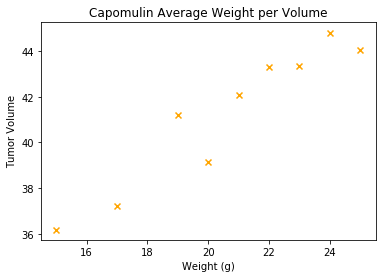

In [13]:
plt.scatter(capomulin_keys, capomulin_avg, marker='x', color='orange')
plt.title("Capomulin Average Weight per Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume")
plt.show()

In [14]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

#Collect weight and average tumor
weight = capomulin_keys
avg_volume = capomulin_avg

#Calculate correlation coefficient
correlation = st.pearsonr(weight, avg_volume)

print(f"The correlation coefficient is {round(correlation[0], 2)}.")

The correlation coefficient is 0.95.


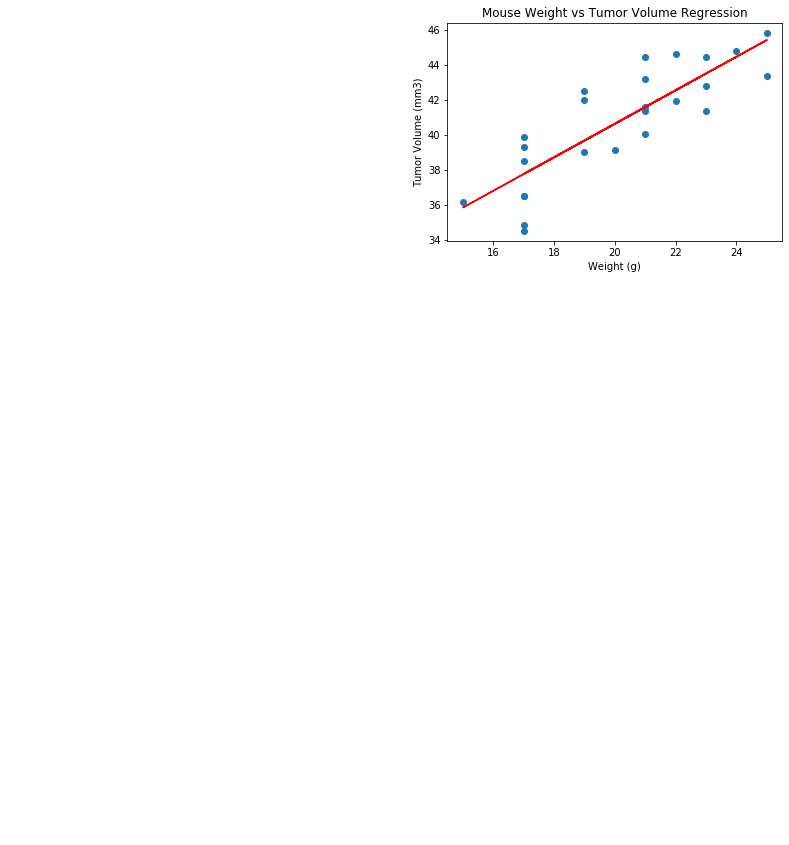

In [34]:
capo_data = merge_data.loc[merge_data["Drug Regimen"] == "Capomulin"]
capo_avg = capomulin_data.groupby("Mouse ID").mean()

x_value = capo_avg["Weight (g)"]
y_value = capo_avg["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value,y_value)
plt.plot(x_value,regress,"r-")
plt.annotate(line_eq,(0,0),fontsize=5,color="red")
plt.title("Mouse Weight vs Tumor Volume Regression")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()